# Probability Mass Functions

In the previous chapter we represented distributions using a `Hist` object, which contains a set of quantities and their frequencies -- that is, the number of times each one appears.
In this chapter we'll introduce another way to represent a distribution: a `Pmf` object, which contains a set of quantities and their probabilities.

And we'll use `Pmf` objects to ...

In [4]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2


<IPython.core.display.Javascript object>

In [5]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

<IPython.core.display.Javascript object>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

<IPython.core.display.Javascript object>

## PMFs

A `Pmf` object is like a `Hist` that contains probabilities instead of frequencies.
So one way to make a `Pmf` is to start with a `Hist`.
For example, here's a `Hist` that represents the distribution of values in a short sequence.

In [7]:
from empiricaldist import Hist

hist = Hist.from_seq([1, 2, 2, 3, 5])
hist

,freqs
1,1
2,2
3,1
5,1


<IPython.core.display.Javascript object>

The sum of the frequencies is the size of the original sequence.

In [8]:
n = hist.sum()
n

5

<IPython.core.display.Javascript object>

If we divide the frequencies by `n`, they represent proportions, rather than counts.

In [9]:
pmf = hist / n
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


<IPython.core.display.Javascript object>

This result indicates that 20% of the values in the sequence are 1, 40% are 2, and so on.

We can also think of these proportions as probabilities in the following sense: if we choose a random value from the original sequence, the probability we choose the value 1 is 0.2, the probability we choose the value 2 is 0.4, and so on.

Because we divided through by `n`, the sum of the probabilities is 1, which means that this distribution is **normalized**.

In [10]:
pmf.sum()

1.0

<IPython.core.display.Javascript object>

A normalized `Hist` object represents a **probability mass function** (PMF), so-called because probabilities associated with discrete quantities are also called "probability masses".

The `empiricaldist` library provides a `Pmf` object that represents a probability mass function, so instead of creating a `Hist` object and then normalizing it, we can create a `Pmf` object directly.

In [11]:
from empiricaldist import Pmf

pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


<IPython.core.display.Javascript object>

The `Pmf` is normalized so the total probability is 1.

In [12]:
pmf.sum()

1.0

<IPython.core.display.Javascript object>

`Pmf` and `Hist` objects are similar in many ways.
To look up the probability associated with a value, we can use the bracket operator.

In [13]:
pmf[2]

0.4

<IPython.core.display.Javascript object>

Or use parentheses to call the `Pmf` like a function.

In [14]:
pmf(2)

0.4

<IPython.core.display.Javascript object>

To assign a probability to a quantity, you have to use the bracket operator.

In [15]:
pmf[2] = 0.2
pmf(2)

0.2

<IPython.core.display.Javascript object>

You can modify an existing `Pmf` by incrementing the probability associated with a value:

In [16]:
pmf[2] += 0.3
pmf[2]

0.5

<IPython.core.display.Javascript object>

Or you can multiply a probability by a factor:

In [17]:
pmf[2] *= 0.5
pmf[2]

0.25

<IPython.core.display.Javascript object>

If you modify a `Pmf`, the result may not be normalized -- that is, the probabilities may no longer add up to 1.

In [18]:
pmf.sum()

0.8500000000000001

<IPython.core.display.Javascript object>

The `normalize` method renormalizes the `Pmf` by dividing through by the sum -- and returning the sum. 

In [19]:
pmf.normalize()

0.8500000000000001

<IPython.core.display.Javascript object>

`Pmf` objects provide a `copy` method so you can make and modify a copy without affecting the original.

In [20]:
pmf.copy()

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


<IPython.core.display.Javascript object>

Like a `Hist` object, a `Pmf` object has a `qs` attribute that accesses the quantities and a `ps` attribute that accesses the probabilities.

It also has a `bar` method that plots the `Pmf` as a bar graph and a `plot` method that plots it as a line graph.

## Summary Statistics

In Section XXX we computed the mean of a sample by adding up the elements and dividing by `n`.
Here's a simple example.

In [21]:
seq = [1, 2, 2, 3, 5]

mean = np.sum(seq) / len(seq)
mean

2.6

<IPython.core.display.Javascript object>

Now suppose we compute the PMF of the values in the sequence.

In [23]:
pmf = Pmf.from_seq(seq)

<IPython.core.display.Javascript object>

Given the `Pmf`, we can still compute the mean, but the process is different -- we have to multiply the probabilities and quantities and add up the products.

In [24]:
mean = np.sum(pmf.ps * pmf.qs)
mean

2.6

<IPython.core.display.Javascript object>

The `mean` method does the same thing.

In [25]:
pmf.mean()

2.6

<IPython.core.display.Javascript object>

Notice that we *don't* have to divide by `n`, because we already did that when we normalized the `Pmf`.

Give a `Pmf`, we can compute the variance by computing the deviation of each quantity from the mean.

In [26]:
deviations = pmf.qs - mean

<IPython.core.display.Javascript object>

Then we multiply the squared deviations by the probabilities and add up the products.

In [27]:
var = np.sum(pmf.ps * deviations**2)
var

1.84

<IPython.core.display.Javascript object>

The `var` method does the same thing.

In [28]:
pmf.var()

1.84

<IPython.core.display.Javascript object>

From the variance, we can compute the standard deviation in the usual way.

In [29]:
np.sqrt(var)

1.3564659966250536

<IPython.core.display.Javascript object>

Or the `std` method does the same thing.

In [30]:
pmf.std()

1.3564659966250536

<IPython.core.display.Javascript object>

`Pmf` also provides a `mode` method that finds the value with the highest probability.

In [31]:
pmf.mode()

2

<IPython.core.display.Javascript object>

## The Class Size Paradox

As an example of what we can do with `Pmf` objects, let's consider a phenomenon I call "the class size paradox."

At many American colleges and universities, the student-to-faculty ratio is about 10:1.
But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for the discrepancy:

-   Students typically take 4 or 5 classes per semester, but professors often teach 1 or 2.

-   The number of students who enjoy a small class is small, but the number of students in a large class is large.

The first effect is obvious, at least once it is pointed out; the second is more subtle.
Let's look at an example.
Suppose that a college offers 65 classes in a given semester, and we are given the number of classes in each of the following size ranges.

In [59]:
ranges = pd.interval_range(start=5, end=50, freq=5, closed="left")
ranges.name = "class size"

data = pd.DataFrame(index=ranges)
data["count"] = [8, 8, 14, 4, 6, 12, 8, 3, 2]
data

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


<IPython.core.display.Javascript object>

Since we don't know the sizes of the classes in each range, let's assume that all sizes are at the midpoint of the range.

In [62]:
sizes = intervals.left + 2
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

<IPython.core.display.Javascript object>

Now let's make a `Pmf` that represents the distribution of class sizes.
Because we already know the frequency of each size, we don't have to use `from_seq`; instead, we can create a `Pmf` directly, passing as arguments the counts, sizes, and name.
When we normalize the new `Pmf`, the result is the sum of the counts.

In [89]:
counts = data["count"]
actual_pmf = Pmf(counts, sizes, name="actual")
actual_pmf.normalize()

65

<IPython.core.display.Javascript object>

If you ask the college for the average class size, they report the mean of this distribution, which is 23.7.

In [71]:
print("mean", actual_pmf.mean())

mean 23.692307692307693


<IPython.core.display.Javascript object>

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, the average is bigger.
Let's see how much bigger.

The following function takes the actual `Pmf` of class sizes and makes a new `Pmf` that represents the class sizes as seen by students.
The quantities in the two distributions are the same, but the probabilities in the distribution are multiplied by the quantities, because in a class with size `x`, there are `x` students who observe that class.
So the probability of observing a class is proportional to its size.

In [90]:
def bias(pmf, name):
    qs = pmf.qs
    ps = pmf.ps * pmf.qs

    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

<IPython.core.display.Javascript object>

Now we can compute the biased `Pmf` as observed by students.

In [91]:
observed_pmf = bias_pmf(actual_pmf, name="observed")

<IPython.core.display.Javascript object>

Here's what the two distributions look like.

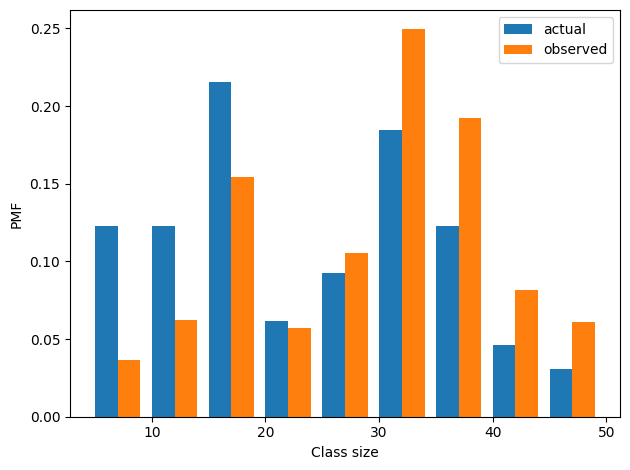

<IPython.core.display.Javascript object>

In [92]:
from thinkstats import two_bar_plots

two_bar_plots(actual_pmf, observed_pmf, width=2)
decorate(xlabel="Class size", ylabel="PMF")

In the observed distribution there are fewer small classes and more large ones.
And the mean is 29.1, almost 25% higher than the actual mean.

In [93]:
observed_pmf.mean()

29.123376623376622

<IPython.core.display.Javascript object>

It is also possible to invert this operation.
Suppose you want to find the distribution of class sizes at a college, but you can't get reliable data.
One option is to choose a random sample of students and ask how many students are in their classes.

The result would be biased for the reasons we've just seen, but you can use it to estimate the actual distribution.
Here's the function that unbiases a `Pmf` by dividing the probabilities by the sizes.

In [94]:
def unbias(pmf, name):
    qs = pmf.qs
    ps = pmf.ps / pmf.qs

    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

<IPython.core.display.Javascript object>

And here's the result.

In [88]:
debiased_pmf = unbias(observed_pmf, "debiased")
debiased_pmf.mean()

23.692307692307693

<IPython.core.display.Javascript object>

The mean of the debiased `Pmf` is the same as the mean of the actual distribution we started with.
If you think this example is interesting, you might like Chapter 2 of *Probably Overthinking It*, which includes this and several other examples of what's called the "inspection paradox".

## NSFG Data

In the previous chapter, we plotting histograms for the distributions of pregnancy lengths for first babies and others.
But the sizes of the groups are not the same, so we can't compare the histograms directly.
Because PMFs are normalized so they add up to 1, we can compare them.

Again, we can use `read_fem_preg` to read the pregnancy file and use the `query` method to select live births.

In [48]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

<IPython.core.display.Javascript object>

In [49]:
from nsfg import read_fem_preg

preg = read_fem_preg()
live = preg.query("outcome == 1")

<IPython.core.display.Javascript object>

We can use `birthord` to separate first babies and others into two groups.

In [50]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

<IPython.core.display.Javascript object>

And make a `Pmf` for the pregnancy lengths in each group.

In [51]:
first_pmf = Pmf.from_seq(firsts["prglngth"], name="firsts")
other_pmf = Pmf.from_seq(others["prglngth"], name="others")

<IPython.core.display.Javascript object>

Here are the PMFs of pregnancy length for first babies and others, plotted as bar graphs.

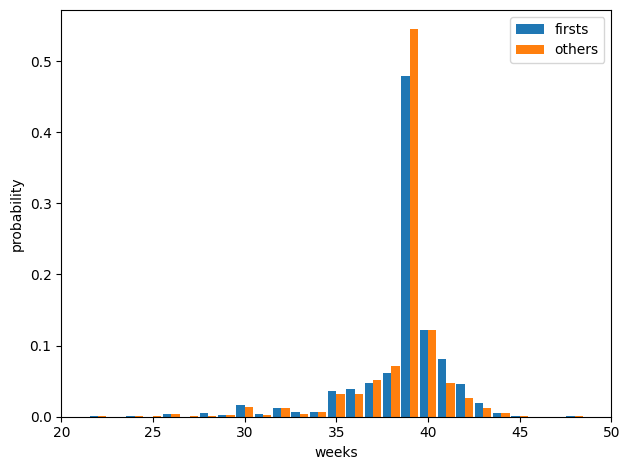

<IPython.core.display.Javascript object>

In [52]:
from thinkstats import two_bar_plots

two_bar_plots(first_pmf, other_pmf)
decorate(xlabel="weeks", ylabel="probability", xlim=[20, 50])

By plotting the PMF instead of the histogram, we can compare the two distributions without being mislead by the difference in sample size.
Based on this figure, first babies seem to be less likely than others to arrive on time (week 39) and more likely to be late (weeks 41 and 42).

## Other visualizations

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships.
Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

In the NSFG data, the biggest differences in the distributions are near the mode.
So it makes sense to zoom in on that part of the graph, and to transform the data to emphasize differences:

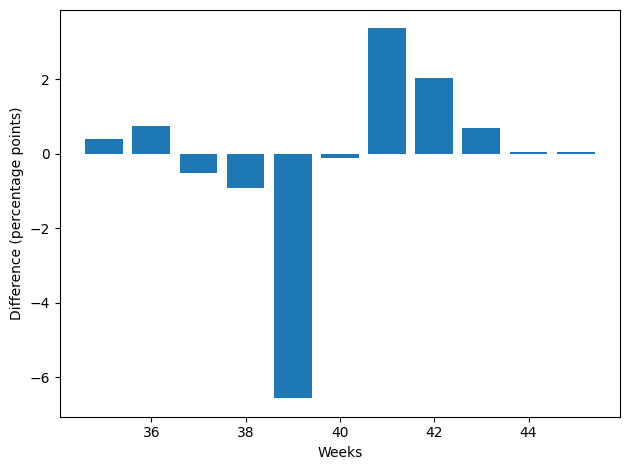

<IPython.core.display.Javascript object>

In [19]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf(week)
    p2 = other_pmf(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

plt.bar(weeks, diffs)
decorate(xlabel="Weeks", ylabel="Difference (percentage points)")

In this code, `weeks` is the range of weeks; `diffs` is the difference between the two PMFs in percentage points.
The following figure shows the result as a bar chart.
This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

For now we should hold this conclusion only tentatively.
We used the same dataset to identify an apparent difference and then chose a visualization that makes the difference apparent.
We can't be sure this effect is real; it might be due to random variation.
We'll address this concern later.

## Glossary

-   **Probability mass function (PMF)**: a representation of a distribution as a function that maps from values to probabilities.

-   **probability**: A frequency expressed as a fraction of the sample size.

-   **normalization**: The process of dividing a frequency by a sample size to get a probability.

-   **index**: In a Pandas `DataFrame`, the index is a special column that contains the row labels.

## Exercises

### Exercise

In [53]:
pmf_birthweight = Pmf.from_seq(live["totalwgt_lb"])

<IPython.core.display.Javascript object>

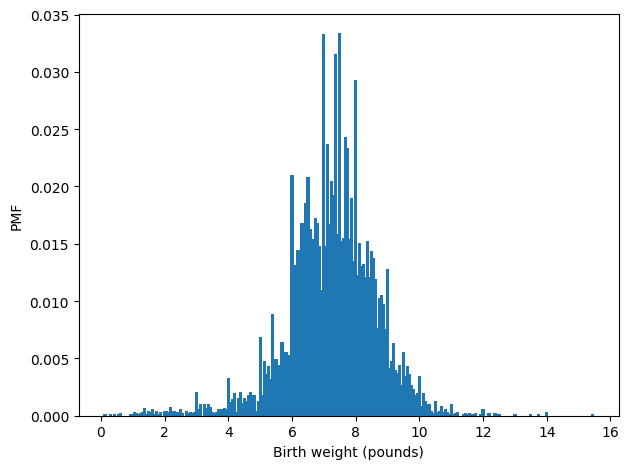

<IPython.core.display.Javascript object>

In [58]:
pmf_birthweight.bar(width=0.1)
decorate(xlabel="Birth weight (pounds)", ylabel="PMF")

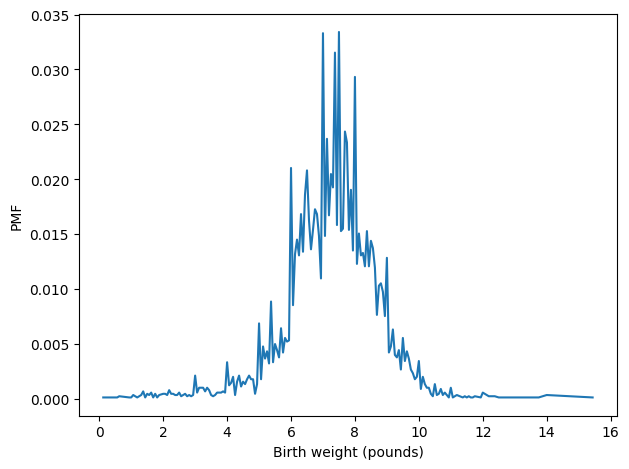

<IPython.core.display.Javascript object>

In [59]:
pmf_birthweight.plot()
decorate(xlabel="Birth weight (pounds)", ylabel="PMF")

In [36]:
# Solution


def pmf_var(pmf):
    """Computes the variance of a PMF.

    returns: float variance
    """
    mu = pmf_mean(pmf)
    return sum(p * (x - mu) ** 2 for x, p in pmf.items())


pmf_var(pmf)

1.84

<IPython.core.display.Javascript object>

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family.
Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [37]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

<IPython.core.display.Javascript object>

In [38]:
resp = nsfg.read_fem_resp()

<IPython.core.display.Javascript object>

In [39]:
# Solution

pmf = Pmf.from_seq(resp.numkdhh, name="numkdhh")

<IPython.core.display.Javascript object>

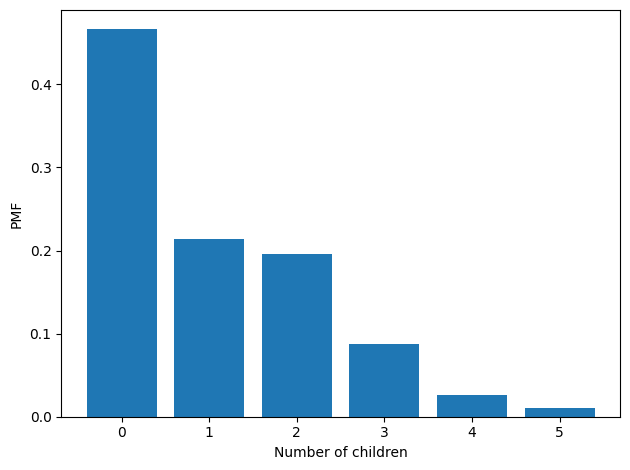

<IPython.core.display.Javascript object>

In [40]:
# Solution

pmf.bar()
decorate(xlabel="Number of children", ylabel="PMF")

In [41]:
# Solution

biased = bias_pmf(pmf, name="biased")

<IPython.core.display.Javascript object>

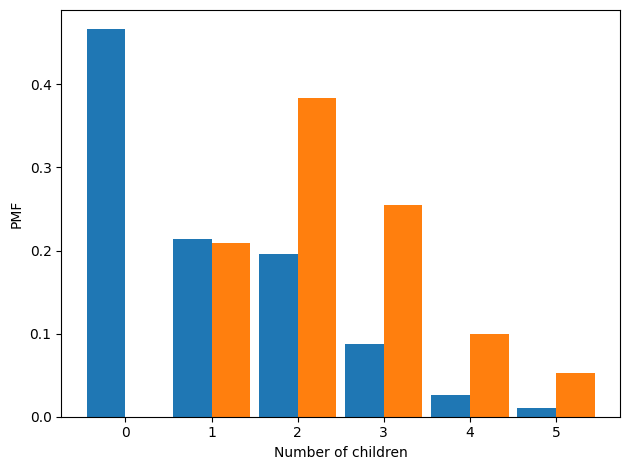

<IPython.core.display.Javascript object>

In [42]:
# Solution

two_bar_plots(pmf, biased)
decorate(xlabel="Number of children", ylabel="PMF")

In [43]:
# Solution

pmf.mean()

1.024205155043831

<IPython.core.display.Javascript object>

In [44]:
# Solution

biased.mean()

2.403679100664282

<IPython.core.display.Javascript object>

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences.
Does this formulation of the question yield a different result?

In [45]:
live, firsts, others = nsfg.make_frames()

<IPython.core.display.Javascript object>

In [46]:
preg_map = nsfg.make_preg_map(live)

<IPython.core.display.Javascript object>

In [47]:
# Solution

diffs = []
for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        first, second = live.prglngth.loc[indices[0:2]]
        diff = first - second
        diffs.append(diff)

hist = Hist.from_seq(diffs, name="diffs")

<IPython.core.display.Javascript object>

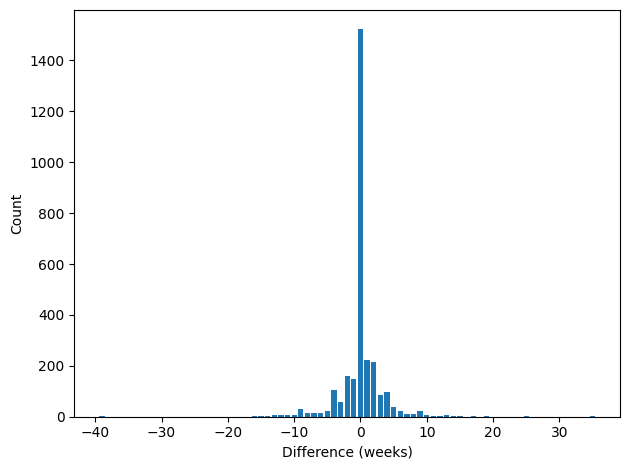

<IPython.core.display.Javascript object>

In [48]:
# Solution

hist.bar()
decorate(xlabel="Difference (weeks)", ylabel="Count")

In [49]:
# Solution

pmf = Pmf.from_seq(diffs)
pmf.mean()

0.0563674321503132

<IPython.core.display.Javascript object>

**Exercise:** In most foot races, everyone starts at the same time.
If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size.
The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location.
When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds.
I am more likely to catch a slow runner, and more likely to be caught by a fast runner.
But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners' speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners' speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham, Massachusetts and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [50]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/relay.py")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/data/Apr25_27thAn_set1.shtml"
)

<IPython.core.display.Javascript object>

In [51]:
import relay

results = relay.read_results()
speeds = relay.get_speeds(results)
speeds = relay.bin_data(speeds, 3, 12, 100)

<IPython.core.display.Javascript object>

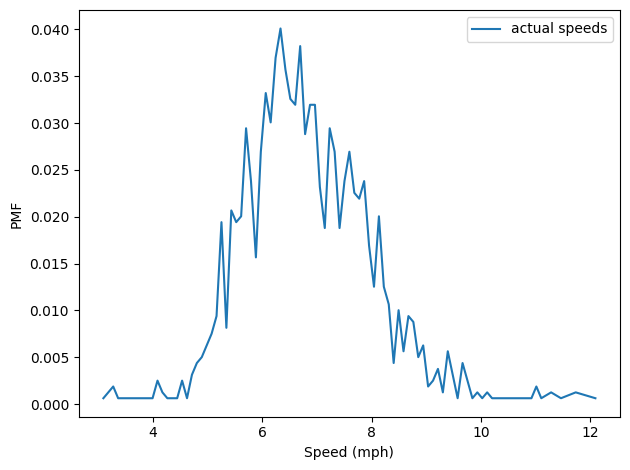

<IPython.core.display.Javascript object>

In [52]:
# Solution

pmf = Pmf.from_seq(speeds, name="actual speeds")
pmf.plot()
decorate(xlabel="Speed (mph)", ylabel="PMF")

In [53]:
# Solution


def observed_pmf(pmf, speed, name=None):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        name: string name for the new dist

    Returns:
        Pmf object
    """
    new = pmf.copy()
    new.name = name

    for val, prob in new.items():
        diff = abs(val - speed)
        new[val] *= diff

    new.normalize()
    return new

<IPython.core.display.Javascript object>

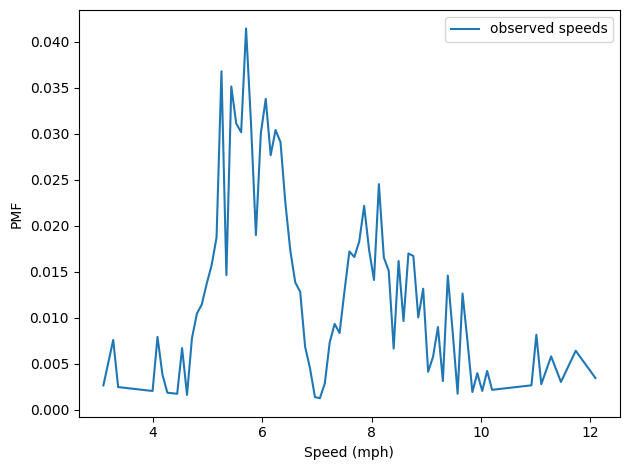

<IPython.core.display.Javascript object>

In [54]:
# Solution

biased = observed_pmf(pmf, 7, name="observed speeds")
biased.plot()
decorate(xlabel="Speed (mph)", ylabel="PMF")